<a href="https://colab.research.google.com/github/gastonbubble/MLOps/blob/main/notebook_incomplet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<b>Objectif :</b>

En utilisant le dataset `synthetic_housing_dataset.csv`, vous allez préparer un modèle de prediction de prix d'appartement étant données ses caractéristiques

<b>Directives :</b>

Veuillez suivre les étapes de `CRISP-DM` pour dévéloper le modèle.

## Compérehsnion du métier

## Compréhension des données

Diviser les données en entrée (features X) et sortie (cible y)

In [3]:

import pandas as pd
housing_data = pd.read_csv("/content/synthetic_housing_dataset.csv")
housing_data.head()

X = housing_data.drop(columns=['price'])
y = housing_data['price']

In [4]:
X.shape, y.shape

((100, 8), (100,))

Diviser les données en train et test (X_train, X_test, y_train, y_test)

In [5]:
# Utiliser la fonction train_test_split
from sklearn.model_selection import train_test_split

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vérifier les dimensions des ensembles
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((80, 8), (20, 8), (80,), (20,))

Vérifier les types des colonnes

In [6]:
column_types = housing_data.dtypes

# Afficher les types des colonnes
column_types

,0
size_m2,float64
num_bedrooms,float64
num_bathrooms,float64
distance_school,float64
public_transport_access,float64
property_tax,float64
date_built,object
city,object
price,float64


Analyse descriptive

Analyse des valeurs manquantes

Analyse des valeurs aberantes (outliers)

In [7]:
# Utiliser IQR
# Identifier les valeurs aberrantes en utilisant l'IQR (Interquartile Range)
outlier_analysis = {}

for column in housing_data.select_dtypes(include=['float64']).columns:
    Q1 = housing_data[column].quantile(0.25)
    Q3 = housing_data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = housing_data[(housing_data[column] < lower_bound) | (housing_data[column] > upper_bound)]
    outlier_analysis[column] = len(outliers)

# Afficher le nombre de valeurs aberrantes par colonne
outlier_analysis


{'size_m2': 4,
 'num_bedrooms': 2,
 'num_bathrooms': 1,
 'distance_school': 0,
 'public_transport_access': 0,
 'property_tax': 1,
 'price': 2}

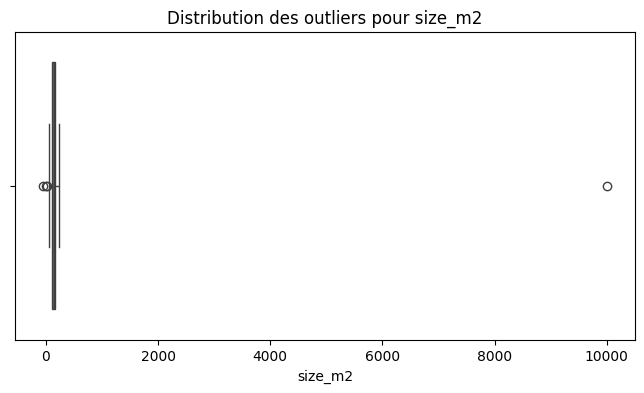

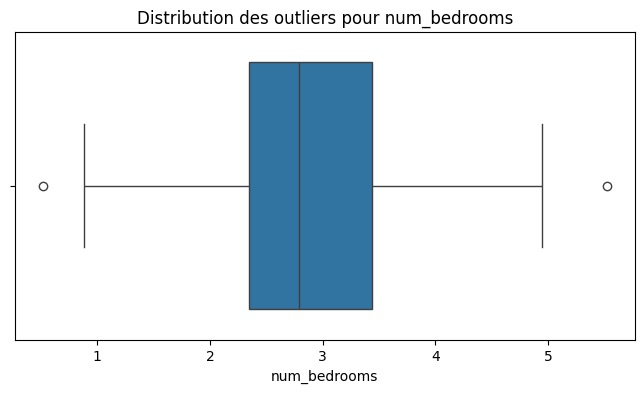

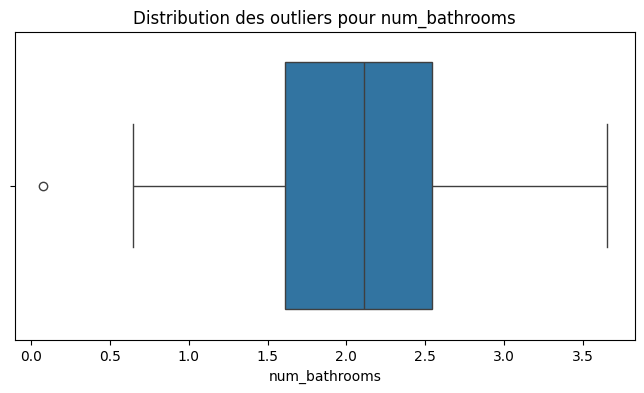

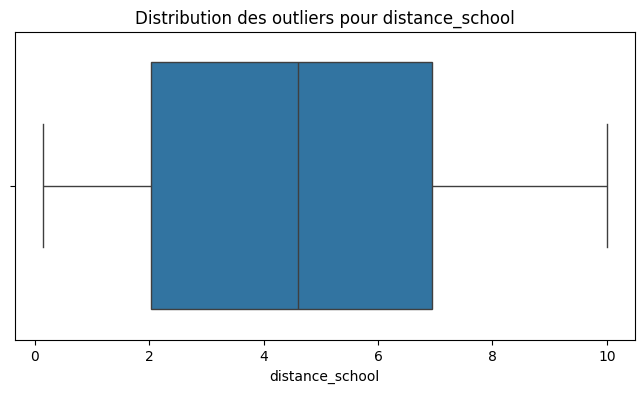

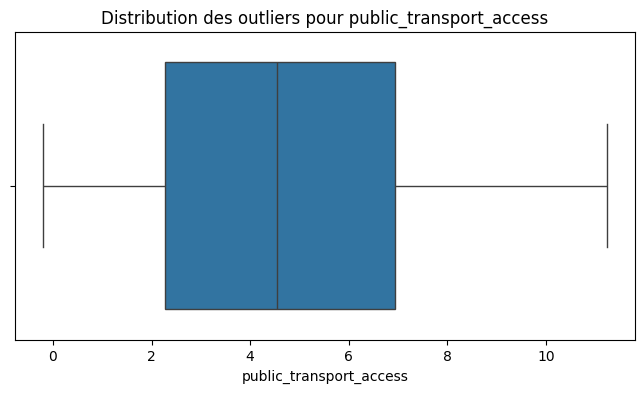

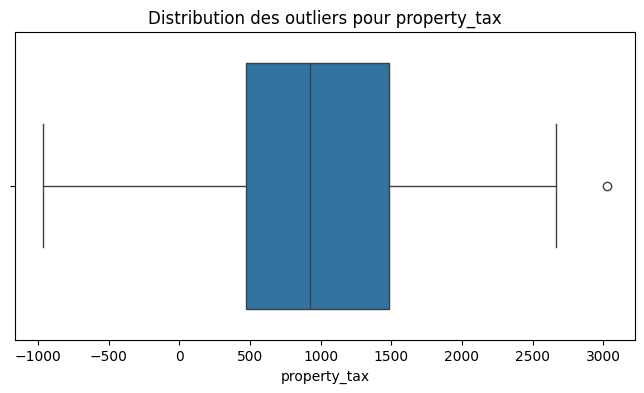

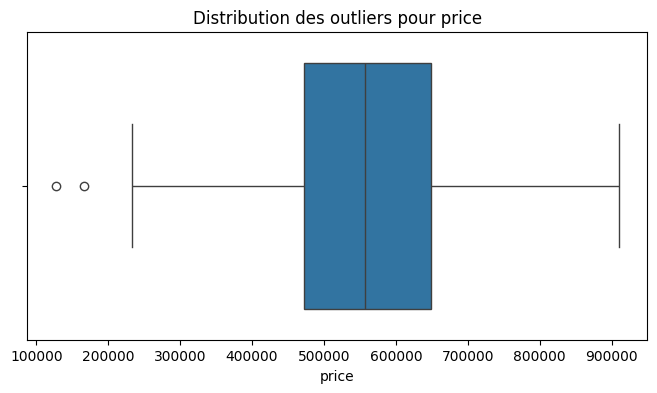

In [8]:
# Utiliser la fonction sns.boxplot
import seaborn as sns
import matplotlib.pyplot as plt

# Visualiser les outliers pour chaque colonne avec sns.boxplot
for column in housing_data.select_dtypes(include=['float64']).columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=housing_data[column])
    plt.title(f'Distribution des outliers pour {column}')
    plt.show()


## Préparation des données

Nettoyage des données

In [9]:
# Imputation des valeurs manquantes
# Vérification des valeurs manquantes dans le dataset
missing_values = housing_data.isnull().sum()

# Imputation des valeurs manquantes
# Pour les colonnes numériques, on peut remplir par la médiane
for column in housing_data.select_dtypes(include=['float64']).columns:
    housing_data[column].fillna(housing_data[column].median(), inplace=True)

# Pour les colonnes catégoriques, remplir par la modalité la plus fréquente
for column in housing_data.select_dtypes(include=['object']).columns:
    housing_data[column].fillna(housing_data[column].mode()[0], inplace=True)

# Vérifier si toutes les valeurs manquantes ont été traitées
missing_values_after = housing_data.isnull().sum()

missing_values, missing_values_after


<ipython-input-9-1803ffca8af4>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housing_data[column].fillna(housing_data[column].median(), inplace=True)
<ipython-input-9-1803ffca8af4>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, i

(size_m2                    0
 num_bedrooms               5
 num_bathrooms              0
 distance_school            0
 public_transport_access    3
 property_tax               0
 date_built                 0
 city                       0
 price                      0
 dtype: int64,
 size_m2                    0
 num_bedrooms               0
 num_bathrooms              0
 distance_school            0
 public_transport_access    0
 property_tax               0
 date_built                 0
 city                       0
 price                      0
 dtype: int64)

In [10]:
# Imputation des valeurs aberrantes
for column in housing_data.select_dtypes(include=['float64']).columns:
    Q1 = housing_data[column].quantile(0.25)
    Q3 = housing_data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remplacer les outliers par les limites acceptables
    housing_data.loc[housing_data[column] < lower_bound, column] = lower_bound
    housing_data.loc[housing_data[column] > upper_bound, column] = upper_bound

# Vérifier si les outliers ont été traités
outlier_analysis_after = {}

for column in housing_data.select_dtypes(include=['float64']).columns:
    Q1 = housing_data[column].quantile(0.25)
    Q3 = housing_data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = housing_data[(housing_data[column] < lower_bound) | (housing_data[column] > upper_bound)]
    outlier_analysis_after[column] = len(outliers)

outlier_analysis_after


{'size_m2': 0,
 'num_bedrooms': 0,
 'num_bathrooms': 0,
 'distance_school': 0,
 'public_transport_access': 0,
 'property_tax': 0,
 'price': 0}

Transformation des données

In [12]:
from sklearn.preprocessing import OneHotEncoder

# Encoder les variables catégoriques avec OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop='first')  # Drop 'first' pour éviter la multicolinéarité

# Identifier les colonnes catégoriques
categorical_columns = housing_data.select_dtypes(include=['object']).columns

# Appliquer l'encodage
encoded_features = encoder.fit_transform(housing_data[categorical_columns])

# Transformer les colonnes encodées en DataFrame
encoded_features_df = pd.DataFrame(
    encoded_features,
    columns=encoder.get_feature_names_out(categorical_columns)
)

# Ajouter les colonnes encodées aux données d'origine, en supprimant les colonnes catégoriques initiales
housing_data_encoded = pd.concat([housing_data.drop(columns=categorical_columns), encoded_features_df], axis=1)

# Vérifier les nouvelles colonnes encodées
housing_data_encoded.head()


,size_m2,num_bedrooms,num_bathrooms,distance_school,public_transport_access,property_tax,price,date_built_1961-01-01,date_built_1962-01-01,date_built_1963-01-01,...,date_built_2014-01-01,date_built_2015-01-01,date_built_2016-01-01,date_built_2017-01-01,date_built_2018-01-01,date_built_2019-01-01,date_built_2020-01-01,city_Marseille,city_Paris,city_Toulouse
0,244.624214,2.789029,2.569210,4.148195,5.793163,1244.341795,629535.486411,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,40.979846,2.651413,2.156254,2.734071,2.485035,-558.753511,682734.110117,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,40.979846,3.476331,2.822102,0.563755,1.140312,230.558272,705054.855203,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,226.151493,4.121891,3.441496,8.647224,8.958474,2114.877349,550261.271344,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,138.292331,2.685204,1.700071,8.129010,11.207891,886.508895,510619.235213,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [13]:
  # Tarnsformer la colonne date en mois
# Convertir la colonne en type datetime
housing_data['date_built'] = pd.to_datetime(housing_data['date_built'], errors='coerce')

# Extraire le mois de construction
housing_data['month_built'] = housing_data['date_built'].dt.month

# Supprimer la colonne `date_built` initiale si elle n'est plus nécessaire
housing_data.drop(columns=['date_built'], inplace=True)

# Vérifier les données après transformation
housing_data.head()


,size_m2,num_bedrooms,num_bathrooms,distance_school,public_transport_access,property_tax,city,price,month_built
0,244.624214,2.789029,2.569210,4.148195,5.793163,1244.341795,Paris,629535.486411,1
1,40.979846,2.651413,2.156254,2.734071,2.485035,-558.753511,Lyon,682734.110117,1
2,40.979846,3.476331,2.822102,0.563755,1.140312,230.558272,Lyon,705054.855203,1
3,226.151493,4.121891,3.441496,8.647224,8.958474,2114.877349,Marseille,550261.271344,1
4,138.292331,2.685204,1.700071,8.129010,11.207891,886.508895,Toulouse,510619.235213,1


In [15]:
# Normaliser les données (en utilinsat STandardScaler)
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Charger les données (assurez-vous que le chemin du fichier est correct)
housing_data = pd.read_csv("/content/synthetic_housing_dataset.csv")

# Initialiser le StandardScaler
scaler = StandardScaler()

# Appliquer la normalisation sur les colonnes numériques
numerical_columns = housing_data.select_dtypes(include=['float64', 'int64']).columns
housing_data[numerical_columns] = scaler.fit_transform(housing_data[numerical_columns])

# Vérifier les données normalisées
housing_data.head()


,size_m2,num_bedrooms,num_bathrooms,distance_school,public_transport_access,property_tax,date_built,city,price
0,9.936508,-0.128344,0.678526,-0.195770,0.378814,0.361734,1988-01-01,Paris,0.528077
1,-0.243615,-0.273136,0.103812,-0.686308,-0.705571,-1.894790,2014-01-01,Lyon,0.894936
2,-0.294516,0.594798,1.030476,-1.439159,-1.146363,-0.906988,1998-01-01,Lyon,1.048861
3,-0.013390,1.274021,1.892489,1.364877,1.416384,1.451185,1962-01-01,Marseille,-0.018600
4,-0.102832,-0.237583,-0.531060,1.185116,2.153730,-0.086084,1991-01-01,Toulouse,-0.291973


Optimisation des données

In [17]:
# Sélectionner les features les plus corrélées avec la cible (price)
# Par exemple, garder seulement les features ayant une corrélation (valeur absolue) > 0.1
# Exclure les colonnes non numériques
numerical_data = housing_data.select_dtypes(include=['float64', 'int64'])

# Calculer la matrice de corrélation sur les données numériques uniquement
correlation_matrix = numerical_data.corr()

# Sélectionner les colonnes ayant une corrélation absolue > 0.1 avec la cible (price)
target_correlation = correlation_matrix['price'].abs()
selected_features = target_correlation[target_correlation > 0.1].index

# Garder uniquement les features sélectionnées dans les données
housing_data_selected = housing_data[selected_features]

# Vérifier les données avec les features sélectionnées
housing_data_selected.head(), selected_features.tolist()


(   num_bedrooms  num_bathrooms     price
 0     -0.128344       0.678526  0.528077
 1     -0.273136       0.103812  0.894936
 2      0.594798       1.030476  1.048861
 3      1.274021       1.892489 -0.018600
 4     -0.237583      -0.531060 -0.291973,
 ['num_bedrooms', 'num_bathrooms', 'price'])

In [20]:
# Réduire les features en utilinsat ACP
# Garder uniquement les 2 features les plus influentes en inertie
from sklearn.decomposition import PCA

# Vérifier et imputer les valeurs manquantes dans les données numériques
numerical_data = housing_data.select_dtypes(include=['float64', 'int64'])
numerical_data = numerical_data.fillna(numerical_data.median())

# Initialiser l'ACP (PCA) pour réduire à 2 dimensions
pca = PCA(n_components=2)

# Appliquer l'ACP sur les données corrigées
reduced_features = pca.fit_transform(numerical_data)

# Créer un DataFrame pour les features réduites
reduced_features_df = pd.DataFrame(reduced_features, columns=['Principal_Component_1', 'Principal_Component_2'])

# Ajouter les nouvelles dimensions au DataFrame
housing_data_with_pca = pd.concat([housing_data.reset_index(drop=True), reduced_features_df], axis=1)

# Vérifier les nouvelles dimensions
housing_data_with_pca[['Principal_Component_1', 'Principal_Component_2']].head()


,Principal_Component_1,Principal_Component_2
0,0.582120,1.611907
1,-1.851120,0.310146
2,-2.029323,1.516138
3,2.448274,1.897543
4,1.914627,-0.698783


## Modeling

In [22]:
# Entrainer la Regression Linéaire avec les données de train
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Diviser les données en ensembles d'entraînement et de test
X = numerical_data.drop(columns=['price'], errors='ignore')  # Exclure la cible si présente
y = numerical_data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialiser et entraîner le modèle de régression linéaire
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)




LinearRegression()

## Evaluation

## Prédire les sorties des données de train et de test avec le modèle entrainé

In [23]:
# Prédire les valeurs pour les données de test
y_pred = linear_model.predict(X_test)


Evaluer la performance du modèle

In [24]:
# Calculer MSE
# Évaluer les performances du modèle
mse = mean_squared_error(y_test, y_pred)


mse

0.9183424765607493

In [25]:
# Calculer R2
r2 = r2_score(y_test, y_pred)

r2

-0.06700216821001836

In [26]:

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 0.9183424765607493
R-squared (R2): -0.06700216821001836


## Déploiement

*Utiliser* le modèle évalué pour prédire le prix d'un apprtement quelconque

In [27]:
# Exemple d'appartement avec des caractéristiques quelconques
sample_apartment = {
    'size_m2': 120.0,
    'num_bedrooms': 3,
    'num_bathrooms': 2,
    'distance_school': 5.0,
    'public_transport_access': 7.0,
    'property_tax': 1000.0
}

# Créer un DataFrame pour l'exemple
sample_apartment_df = pd.DataFrame([sample_apartment])

# Normaliser les données de l'exemple avec le même scaler utilisé pour les données d'entraînement
sample_apartment_normalized = scaler.transform(sample_apartment_df)

# Prédire le prix avec le modèle de régression linéaire
predicted_price = linear_model.predict(sample_apartment_normalized)

print("Le prix prédit pour cet appartement est :", predicted_price[0])


ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- price


In [29]:
!cp /content/notebook_incomplet.ipynb /content/MLOps/


cp: cannot stat '/content/notebook_incomplet.ipynb': No such file or directory


In [30]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [31]:
!git clone https://github.com/gastonbubble/MLOps.git


Cloning into 'MLOps'...


In [32]:
%cd /content/MLOps


/content/MLOps


In [33]:
!cp /content/notebook_incomplet.ipynb /content/MLOps/


cp: cannot stat '/content/notebook_incomplet.ipynb': No such file or directory


In [35]:
%cd /content/MLOps


/content/MLOps


In [36]:
!cp /content/synthetic_housing_dataset.csv /content/MLOps/


In [37]:
!git add synthetic_housing_dataset.csv


In [38]:
!git commit -m "Ajout du fichier synthetic_housing_dataset.csv pour le projet MLOps"


Author identity unknown

*** Please tell me who you are.

Run

  git config --global user.email "you@example.com"
  git config --global user.name "Your Name"

to set your account's default identity.
Omit --global to set the identity only in this repository.

fatal: unable to auto-detect email address (got 'root@3af6a4075dcd.(none)')


remote: Permission to gastonbubble/MLOps.git denied to gastonbubble.
fatal: unable to access 'https://github.com/gastonbubble/MLOps.git/': The requested URL returned error: 403
